# Polynomial regression

### Let's define the function!

\\( y = a_2x^2 + a_1x + a_0 \\)

Traceback (most recent call last):
  File "C:\Users\Konstantinos\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\cbook\__init__.py", line 387, in process
    proxy(*args, **kwargs)
  File "C:\Users\Konstantinos\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\cbook\__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "C:\Users\Konstantinos\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


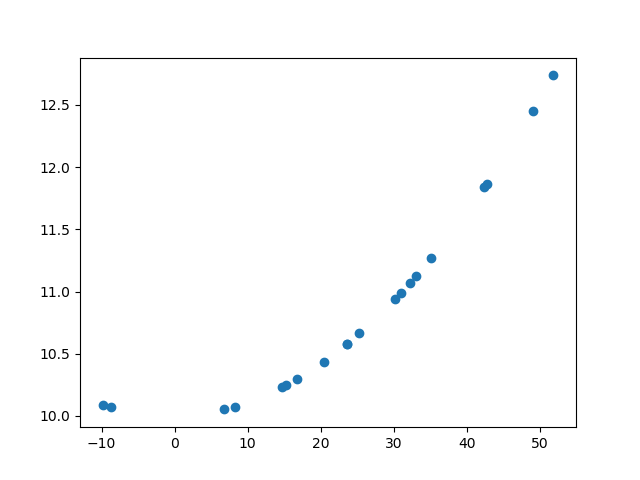

In [478]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# Noise mean and standart deviation
mu, sigma = 0, 0

# Range of input values
range_min = -15
range_max = 75

# Number of examples to use for training
samples = 20

# The "ground-truth" function
a0 = 10
a1 = 0.001
a2 = 0.001
f = lambda x: a2*x**2 + a1*x + a0

# Input values
x = np.random.uniform(range_min, range_max, samples)

# Output values with added noise
y = f(x) + np.random.normal(mu, sigma, samples)

#for in_out in zip(x, y):
#    print("X :{0:.2f} \tY:{1:.2f}".format(in_out[0], in_out[1]))

fig1, ax1 = plt.subplots()
ax1.scatter(x,y)
fig1.show()

In [479]:
x_pow = x**2
x_train = np.dstack((x,x_pow))
x_train = x_train[0,:,:]
x_train = x_train[::, np.newaxis]
print(x_train.shape)

y = y[::, np.newaxis]
y = y[::, np.newaxis]
print(y.shape)

(20, 1, 2)
(20, 1, 1)


---------------------------------------------------------------------------------

### Define the single-neuron network without non-linerity

In [480]:
import keras
from keras.layers import Input, Dense
from keras.models import Model

inputs = Input(shape=(1,2))
preds = Dense(1,activation='linear')(inputs)
preds = Dense(1,activation='linear')(preds)
model = Model(inputs=inputs,outputs=preds)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_53 (InputLayer)        (None, 1, 2)              0         
_________________________________________________________________
dense_73 (Dense)             (None, 1, 1)              3         
_________________________________________________________________
dense_74 (Dense)             (None, 1, 1)              2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


---------------------------------------------------------------------------------

### Set training settings and callbacks

In [481]:
# Print the batch number at the beginning of every batch.
weight_log = []
weight_log_callback = keras.callbacks.LambdaCallback(on_epoch_end=lambda batch,logs: weight_log.append([model.layers[1].get_weights()[0][0][0], model.layers[1].get_weights()[0][1][0], model.layers[1].get_weights()[1][0]]))

# Define optimization algorithm
sgd = keras.optimizers.SGD(lr=0.1)
adam = keras.optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Compile model
model.compile(optimizer=adam ,loss='mse')

---------------------------------------------------------------------------------

### Start training

In [482]:
# Start training
model.fit(x_train, y, batch_size=1, epochs=200, shuffle=False, callbacks=[weight_log_callback])

Epoch 1/200
20/20 [==============================] - 1s 56ms/step - loss: 3246.5222
Epoch 2/200
20/20 [==============================] - 0s 3ms/step - loss: 270.2239
Epoch 3/200
20/20 [==============================] - 0s 3ms/step - loss: 250.8213
Epoch 4/200
20/20 [==============================] - 0s 3ms/step - loss: 97.8018
Epoch 5/200
20/20 [==============================] - 0s 3ms/step - loss: 89.8014
Epoch 6/200
20/20 [==============================] - 0s 3ms/step - loss: 42.4959
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 36.0592
Epoch 8/200
20/20 [==============================] - 0s 2ms/step - loss: 66.2819
Epoch 9/200
20/20 [==============================] - 0s 2ms/step - loss: 134.8676
Epoch 10/200
20/20 [==============================] - 0s 2ms/step - loss: 39.7028
Epoch 11/200
20/20 [==============================] - 0s 3ms/step - loss: 11.4518
Epoch 12/200
20/20 [==============================] - 0s 2ms/step - loss: 11.2127
Epoch 13/200
20/20 

20/20 [==============================] - 0s 2ms/step - loss: 1.7106e-05
Epoch 102/200
20/20 [==============================] - 0s 2ms/step - loss: 1.6492e-05
Epoch 103/200
20/20 [==============================] - 0s 2ms/step - loss: 1.6032e-05
Epoch 104/200
20/20 [==============================] - 0s 2ms/step - loss: 1.5678e-05
Epoch 105/200
20/20 [==============================] - 0s 2ms/step - loss: 1.5389e-05
Epoch 106/200
20/20 [==============================] - 0s 2ms/step - loss: 1.5145e-05
Epoch 107/200
20/20 [==============================] - 0s 2ms/step - loss: 1.4924e-05
Epoch 108/200
20/20 [==============================] - 0s 3ms/step - loss: 1.4723e-05
Epoch 109/200
20/20 [==============================] - 0s 2ms/step - loss: 1.4533e-05
Epoch 110/200
20/20 [==============================] - 0s 2ms/step - loss: 1.4353e-05
Epoch 111/200
20/20 [==============================] - 0s 2ms/step - loss: 1.4174e-05
Epoch 112/200
20/20 [==============================] - 0s 2ms/step -

20/20 [==============================] - 0s 2ms/step - loss: 3.1745e-06
Epoch 197/200
20/20 [==============================] - 0s 2ms/step - loss: 3.1169e-06
Epoch 198/200
20/20 [==============================] - 0s 2ms/step - loss: 3.0588e-06
Epoch 199/200
20/20 [==============================] - 0s 2ms/step - loss: 3.0038e-06
Epoch 200/200
20/20 [==============================] - 0s 2ms/step - loss: 2.9518e-06


-----------------------------------------------------------------------------------------------------------------------------

### Animate training 

<IPython.core.display.Javascript object>


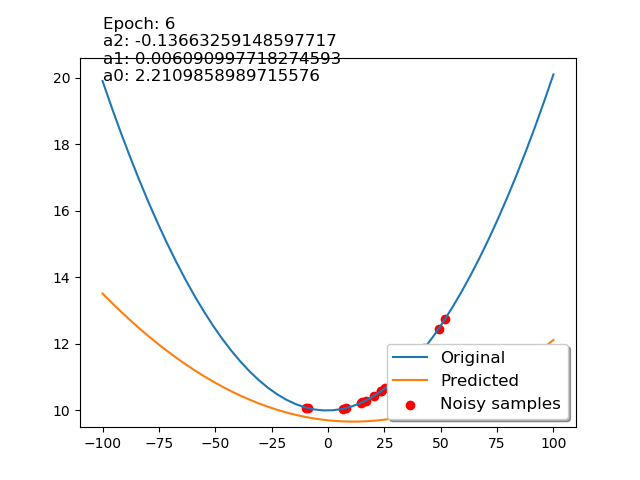

In [483]:
test_input = np.linspace(-100, 100)
test_input_for_model = np.dstack((test_input,test_input**2))
test_input_for_model = test_input_for_model[0,:,:]
test_input_for_model = test_input_for_model[::, np.newaxis]

weights = model.layers[1].get_weights()
tmp_model = model

import matplotlib.animation

fig2, ax2 = plt.subplots()
ax2.scatter(x,y, c='r', label='Noisy samples')
ax2.plot(test_input, f(test_input), label='Original')
data, = ax2.plot([], [], label='Predicted')
text = ax2.text(-100, f(-100), '', fontsize='large')
ax2.legend(loc='lower right', shadow=True, fontsize='large')

def animate(frame, data, weight_log, text):
    weights[0][0] = weight_log[frame][0]
    weights[0][1] = weight_log[frame][1]
    weights[1][0] = weight_log[frame][2]
    tmp_model.layers[1].set_weights(weights)
    data.set_data(test_input, tmp_model.predict(test_input_for_model)[:,0,0])
    text.set_text("Epoch: {}\na2: {}\na1: {}\na0: {}".format(frame, weight_log[frame][0], weight_log[frame][1], weight_log[frame][2]))
    return data, text,
    
ani = matplotlib.animation.FuncAnimation(fig2, animate, frames=len(weight_log), fargs=(data, weight_log, text), interval=50, repeat=True, blit=True)
fig2.show()

-----------------------------------------------------------------------------------------------------------------------------

### Plot slope and bias during training

<IPython.core.display.Javascript object>


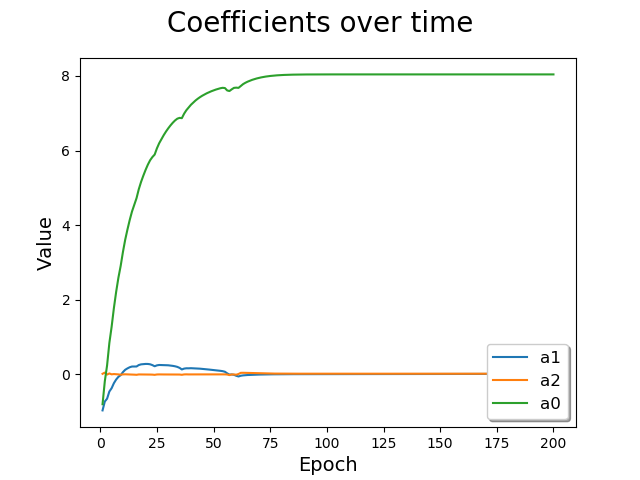

In [484]:
fig3, ax3 = plt.subplots()
a = np.array(weight_log)
epochs = a.shape[0]
ax3.plot(np.linspace(1,epochs,epochs), a[:,0], label='a1')
ax3.plot(np.linspace(1,epochs,epochs), a[:,1], label='a2')
ax3.plot(np.linspace(1,epochs,epochs), a[:,2], label='a0')
fig3.suptitle('Coefficients over time', fontsize=20)
ax3.set_xlabel('Epoch', fontsize=14)
ax3.set_ylabel('Value', fontsize=14)
ax3.legend(loc='lower right', shadow=True, fontsize='large')
fig3.show()

-----------------------------------------------------------------------------------------------------------------------------

### Calculate and visualize cost function for given function

<IPython.core.display.Javascript object>


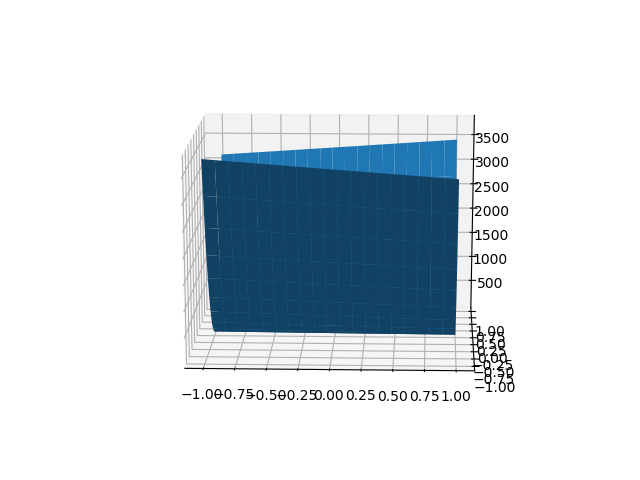

In [485]:
from sklearn.metrics import mean_squared_error

a1_points = 20
a2_points = 20
loss = np.zeros((a1_points, a2_points), dtype='float32')
a1 = np.linspace(-1, 1, a1_points)
a2 = np.linspace(-1, 1, a2_points)
for i, a1_val in enumerate(a1):
    for j, a2_val in enumerate(a2):
        weights[0][0] = a1_val
        weights[0][1] = a2_val
        weights[1][0] = 0
        tmp_model.layers[1].set_weights(weights)
        loss[j,i] = mean_squared_error(y[:,0,0], tmp_model.predict(x_train)[:,0,0])

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

A1, A2 = np.meshgrid(a1, a2)
ax.plot_surface(A1, A2, loss)

plt.show()